1- book ---> list that contain each words of one book after split

2- books ---> list that contain lists , each of them contain words of each book after split

3- vocab----->  conrain all words without redundancy

4- paragraphs ------> contain each words with redundancy 

5- b_count -----> number of books in the list

6- w_ -----> number of words in one book 

#import libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

!pip install wordcloud
import wordcloud
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn import tree
import nltk
import re
import random
from nltk.corpus import gutenberg,stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.collocations import *
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Data preperation
import gensim
from gensim.corpora import Dictionary

# Models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# use to find bigrams, which are pairs of words
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures,TrigramAssocMeasures
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download("gutenberg")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopset = set(stopwords.words('english'))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Read_books

In [ ]:
def read_books(urls):
  import requests
  books = []
  for u in urls:
    res = requests.get(u, allow_redirects=True)
    #allow ->>>> if true allow post/put/delete
    if(res.status_code==404):
      raise Exception('Please Enter a valid URL. ' + u + ' does not exist!')
      return
    res.encoding = 'utf-8-sig'
    #making encoding(تشفير علشان لو فى حروف مشوشه ما يحصلشى error ) 
    book = res.text
    book = list(book.split())
    books.append(book)
  return books 

#preprocessing

In [ ]:
def clean_books(books):
  nltk.download('stopwords')
  stop_words = stopwords.words('english')
  ps = PorterStemmer()
  b_count = len(books)
  for b_indx in range(b_count):
    w_count = len(books[b_indx])
    for w_indx in range(w_count):
      books[b_indx][w_indx] = (''.join(re.findall('\w', books[b_indx][w_indx]))).lower()
  for b_indx in range(b_count):
    books[b_indx] = [ps.stem(wrd) for wrd in books[b_indx] if wrd!='' and wrd not in stop_words]
    #remove the stopworks and then return the original word using porter stemmer 

In [ ]:
def random_indx_list(num_pragraphs, paragraph_len, book_lngth):
  import random
  indx = []
  for i in range(0,num_pragraphs):
    n = random.randint(1, book_lngth - paragraph_len - 1)
    indx.append(n)
  return indx

In [ ]:
def get_columns(books, authors, num_pragraphs, paragraph_len):
  paragraphs = []
  for book in books:
    indx = random_indx_list(num_pragraphs, paragraph_len, len(book))
    for i in indx:
      paragraphs.append(book[i:i+100])

  names = []
  for i in range(len(books)):
    for j in range(num_pragraphs):
      names.append(authors[i])
  
  return paragraphs, names

In [ ]:
def serialize(paragraphs, names):
  import pandas as pd
  df = pd.DataFrame()
  df['words'] = paragraphs
  df['book_name'] = names
  return df

In [ ]:
def get_data(urls, authors, num_pragraphs=200, paragraph_len=100):
  if len(urls) != len(authors):
    e = "Number of authors doesn't number of books"
    return e, e
  try:
    books = read_books(urls)
  except Exception as e:
    return e, e
  clean_books(books)
  paragraphs, names = get_columns(books, authors, num_pragraphs, paragraph_len)
  df = serialize(paragraphs, names)
  return df, paragraphs

In [ ]:
urls = ['https://www.gutenberg.org/cache/epub/68063/pg68063.txt', 'https://www.gutenberg.org/cache/epub/68060/pg68060.txt', 'https://www.gutenberg.org/cache/epub/68058/pg68058.txt', 
        'https://www.gutenberg.org/cache/epub/68140/pg68140.txt', 'https://www.gutenberg.org/cache/epub/68141/pg68141.txt']
authors = ["auth1", "auth2", "auth3", "auth4", "auth5"]
df, paragraph = get_data(urls, authors)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,words,book_name
0,"[serv, mass, mass, made, thanksgiv, altar, not...",auth1
1,"[face, good, told, task, perform, spoke, sympa...",auth1
2,"[river, six, feet, wide, group, nissen, hut, w...",auth1
3,"[nearli, went, holi, communion, follow, morn, ...",auth1
4,"[soldier, pass, hous, daili, recal, one, train...",auth1
...,...,...
995,"[never, see, bodi, alter, debbysh, look, hands...",auth5
996,"[project, gutenbergtm, work, calcul, use, meth...",auth5
997,"[parapet, protect, fall, precipic, hung, forc,...",auth5
998,"[pole, daughter, tearless, eye, pensiv, smileu...",auth5


In [ ]:
paragraph=" "
paragraph_list=[]
for x in df['words']:
    paragraph=paragraph.join(x) 
    paragraph_list.append(paragraph)
    paragraph=" "
#paragraph_list =paragraph_list + paragraph_list
paragraph_list

['serv mass mass made thanksgiv altar notic gospel side larg alcov five six priedieux communion rail ran width somewhat similar box theatr wall alcov opposit knelt larg copper slab bear inscript memori edward mari alexand viscount brandt calometz die castl ecoivr 9th octob 1894 r p conclud part church peopl chateau came assist mass old day franc print coin liberti equal fratern saw present owner estat day later wonder sat alcov assist mass sunday tall heavili built man old rough cloth look like labor one would see sit idli dock larg heavi red face thick black mustach saw first stood',
 'face good told task perform spoke sympathet invit call return tea leav father mcpherson thought weigh heavili perhap prayer good priest left follow told fifteenth battalion orderli room privat mckee quarantinedth flu becom quit preval among men found sit bell tent one group pitch larg garden chateau call came walk long garden path tree broke gentli could terribl news took welltook brave quietli like goo

In [ ]:
# def get_sentence(lis):
#   paragraph=" "
#   s =' '.join([w for w in lis])
#   return s


#BOW

In [ ]:
def BOW(sentences_book):
  count_vect = CountVectorizer()
  vectors = count_vect.fit_transform(sentences_book)
  features = count_vect.get_feature_names_out()
  # vectors = vectors.toarray()
  return vectors

BOW(['he is happy he is good', 'he is sad']).toarray()

array([[1, 1, 2, 2, 0],
       [0, 0, 1, 1, 1]])

#Tf_idf

In [ ]:
def TF_IDF(X_train_counts):
  tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
  vectors = tf_transformer.transform(X_train_counts)
  features = tf_transformer.get_feature_names_out()
  # vectors = vectors.toarray()
  return vectors

bow = BOW(['he is happy he is good', 'he is sad'])
TF_IDF(bow).toarray()

array([[0.31622777, 0.31622777, 0.63245553, 0.63245553, 0.        ],
       [0.        , 0.        , 0.57735027, 0.57735027, 0.57735027]])

#N_gram

In [ ]:
def Ngram(sentences_book):
  tfidf = TfidfVectorizer(ngram_range = (1, 2))
  vectors = tfidf.fit_transform(sentences_book)
  features = tfidf.get_feature_names_out()
  # vectors = vectors.toarray()
  return vectors
Ngram(['he is happy he is good', 'he is sad']).toarray()

array([[0.30048967, 0.30048967, 0.30048967, 0.42760175, 0.42760175,
        0.42760175, 0.30048967, 0.30048967, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.37930349, 0.37930349,
        0.37930349, 0.        , 0.        , 0.53309782, 0.53309782]])

In [ ]:
# def N_gram(words_book):
#   bigram_measures = nltk.collocations.BigramAssocMeasures()
#   trigram_measures = nltk.collocations.TrigramAssocMeasures()
#   finder = BigramCollocationFinder.from_words(words_book)
#   #top ten bigram collocations in Genesis
#   result =finder.nbest(bigram_measures.pmi, 10)
#   return result

#LDA

In [ ]:
def lda_training(n_topics, dictionary):
  lda_model = gensim.models.LdaModel(bow_,
               id2word = dictionary,
               num_topics = n_topics,
               random_state = 100,
               passes = 50,
               iterations = 500, 
               chunksize = 100,
               )
  coherence_lda = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts=df['words'], dictionary=dictionary , coherence='c_v')
  coherence_lda = coherence_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  print(lda_model.print_topics())
  return lda_model

In [ ]:
# lda_training.__code__.co_varnames
# class c:
#   def __init__(self, x):
#     print("constructor")

# a = gensim.models.LdaModel.__init__.__code__.co_varnames
# a

In [ ]:
import pandas as pd
from gensim.corpora import Dictionary
dictionary = Dictionary(df['words'])
bow_ = [dictionary.doc2bow(partition) for partition in df['words']]  # bag of words for each partition
example = pd.DataFrame(bow_[10], columns=["token_id", "frequency"])

In [ ]:
lda1 = lda_training(n_topics = 10,dictionary = dictionary)


Coherence Score:  0.39754147685169205
[(0, '0.008*"wagon" + 0.007*"tom" + 0.007*"patsi" + 0.007*"close" + 0.006*"front" + 0.006*"near" + 0.006*"england" + 0.005*"hous" + 0.005*"point" + 0.005*"fire"'), (1, '0.013*"would" + 0.013*"said" + 0.009*"see" + 0.009*"could" + 0.008*"well" + 0.007*"hand" + 0.007*"must" + 0.007*"take" + 0.007*"mind" + 0.006*"say"'), (2, '0.018*"polit" + 0.013*"novel" + 0.008*"power" + 0.007*"state" + 0.007*"american" + 0.006*"donat" + 0.006*"page" + 0.005*"life" + 0.005*"year" + 0.005*"one"'), (3, '0.044*"work" + 0.039*"project" + 0.025*"gutenbergtm" + 0.015*"copi" + 0.015*"use" + 0.014*"electron" + 0.013*"may" + 0.013*"gutenberg" + 0.013*"term" + 0.013*"foundat"'), (4, '0.023*"nick" + 0.020*"chick" + 0.016*"deland" + 0.014*"chief" + 0.014*"dont" + 0.012*"vaughn" + 0.010*"patsi" + 0.008*"said" + 0.008*"gale" + 0.008*"camera"'), (5, '0.022*"one" + 0.017*"mr" + 0.009*"littl" + 0.009*"two" + 0.007*"old" + 0.007*"time" + 0.007*"day" + 0.007*"would" + 0.006*"come" + 

In [ ]:
# import numpy as np
# import pandas as pd
# feat = []
# for bow in bow_:
#   topics = lda1.get_document_topics(bow, minimum_probability = 0.0)
#   feat.append(np.array([j for i,j in topics]))
#   # print([j for i,j in topics])
# pd.DataFrame(feat)

In [ ]:
print('\nPerplexity: ', lda1.log_perplexity(bow_))

In [ ]:
def feature_vectorize(lda):

  # Convert target column from string to numbers 
  df.book_name = pd.Categorical(df.book_name)
  df['book_name'] = df.book_name.cat.codes

  
  train_vecs = []
  for i in range(len(df['words'])):
    top_topics = lda.get_document_topics(bow_[i], minimum_probability = 0.0)
    topic_vec = [top_topics[i][1] for i in range(len(lda.print_topics()))]
    train_vecs.append(topic_vec)

  features = pd.DataFrame(train_vecs)
  lda_data = features.join(df["book_name"])#.sample(frac = 1)

  lda_x = lda_data[lda_data.columns[:-1]]
  lda_y = pd.DataFrame(lda_data[lda_data.columns[-1]])
  return lda_data, lda_x, lda_y

In [ ]:
train,x_train,y_train = feature_vectorize(lda1)

In [ ]:
def plot_confusion_matrix(model, y_pred, y_test):
  cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()

#classifiers

In [ ]:
#----------naive_bias-----------
def Multinom_NB(x_train,x_test,y_train,y_test):
  clf = MultinomialNB().fit(x_train,y_train)
  predicted=clf.predict(x_test)

  cv_results = cross_val_score(clf,x_train,y_train,cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}')

  print(f'the accuracy is{metrics.accuracy_score(y_test,predicted)}')
  # print(f'the confusion matrix is \n {metrics.confusion_matrix(y_test,predicted)}')

  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

  disp.plot()
  plt.show()
  return clf

In [ ]:
#----------svm-----------
def SVM(x_train,x_test,y_train,y_test):
  clf = SVC(C = 50).fit(x_train, np.ravel(y_train))
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train, np.ravel(y_train), cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}') 

  print(f'the accuracy is{metrics.accuracy_score(np.ravel(y_test), predicted)}')
 # print(f'the confusion matrix is \n {metrics.confusion_matrix(np.ravel(y_test), predicted)}')


  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

In [ ]:
#----------Decision Tree-----------
def Decesion_tree(x_train,x_test,y_train,y_test):
  clf = tree.DecisionTreeClassifier().fit(x_train,y_train)
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train,y_train,cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}')

  print(f'the accuracy is{metrics.accuracy_score(y_test,predicted)}')
  #print(f'the confusion matrix is \n {metrics.confusion_matrix(y_test,predicted)}')

  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

In [ ]:
#---------KNeighborsClassifier------------
def kneighborsClassifier(x_train,x_test,y_train,y_test):
  clf=KNeighborsClassifier(n_neighbors=5)
  clf =clf.fit(x_train, np.ravel(y_train))
  predicted=clf.predict(x_test)
  cv_results = cross_val_score(clf,x_train, np.ravel(y_train), cv=10)
  print(f'the cross_validation result is {np.mean(cv_results)}') 

  print(f'the accuracy is{metrics.accuracy_score(np.ravel(y_test), predicted)}')
 # print(f'the confusion matrix is \n {metrics.confusion_matrix(np.ravel(y_test), predicted)}')


  #Display cross validation models accuracy
  plt.bar(np.arange(10), cv_results, color = 'green')
  plt.show()
  
  #display the confusion matrix
  cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()

  return clf

#splitting_data

In [ ]:
def split_data(training,testing):
  x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=.3,random_state=0)
  return x_train,x_test,y_train,y_test
  # print(x_train.shape)
  # print(x_test.shape)
  # print(y_train.shape)
  # print(y_test.shape)

#feature_extraction

In [ ]:
X_train_counts= BOW(paragraph_list)
X_train_tf= TF_IDF(X_train_counts)
x_train_ngram=Ngram(paragraph_list)
lda_data, lda_x, lda_y = feature_vectorize(lda1)

#report data

the cross_validation result is 0.9457142857142857
the accuracy is0.9566666666666667


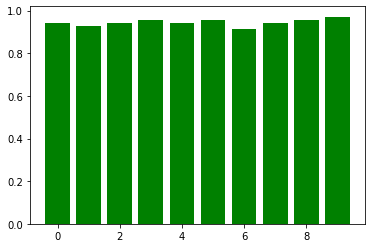

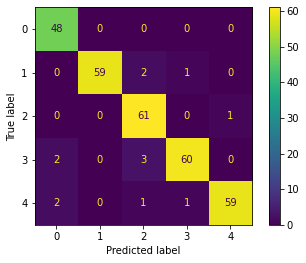

MultinomialNB()

In [ ]:
#apply Multinom_NB on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8557142857142856
the accuracy is0.86


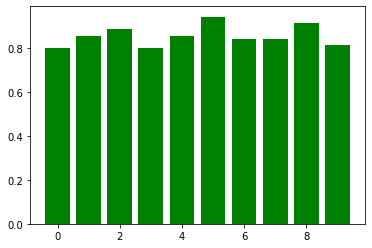

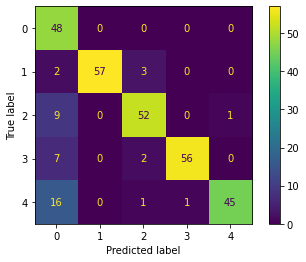

MultinomialNB()

In [ ]:
#apply Multinom_NB on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8957142857142857
the accuracy is0.8933333333333333


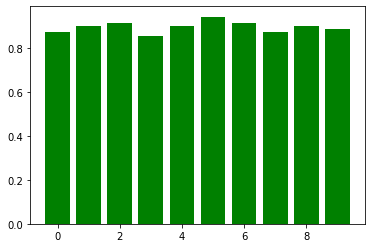

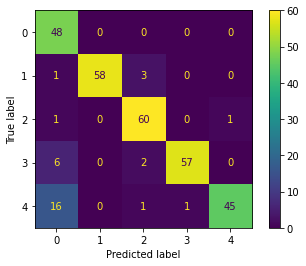

MultinomialNB()

In [ ]:
#apply Multinom_NB on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
Multinom_NB(x_train,x_test,y_train,y_test)

the cross_validation result is 0.9285714285714286
the accuracy is0.95


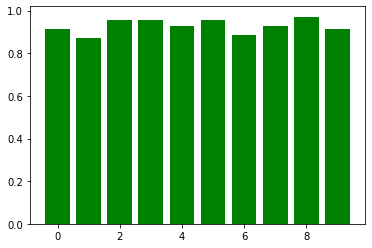

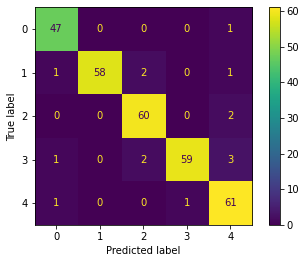

SVC(C=50)

In [ ]:
#apply svm on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.9228571428571429
the accuracy is0.95


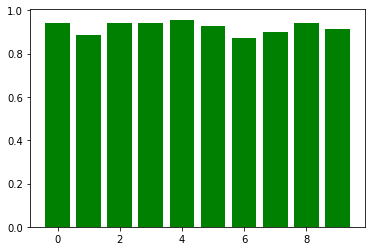

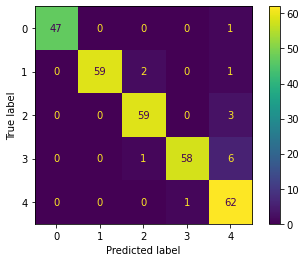

SVC(C=50)

In [ ]:
#apply svm on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.9142857142857143
the accuracy is0.9


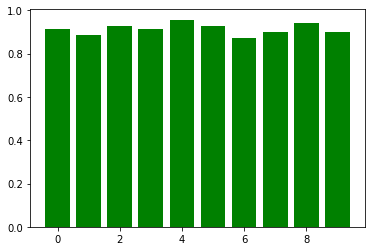

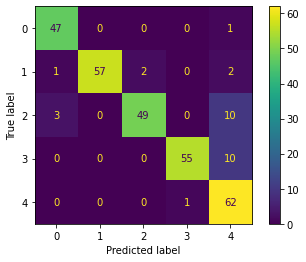

SVC(C=50)

In [ ]:
#apply svm on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.7885714285714285
the accuracy is0.75


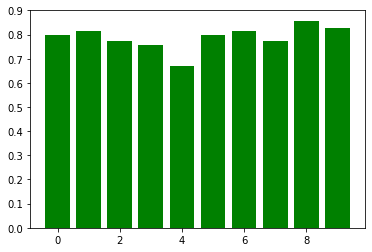

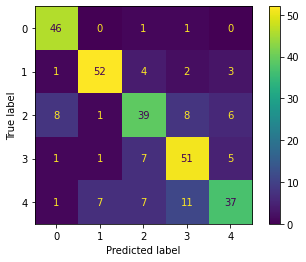

SVC(C=50)

In [ ]:
#apply svm on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
SVM(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8685714285714287
the accuracy is0.8733333333333333


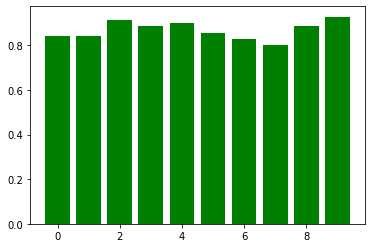

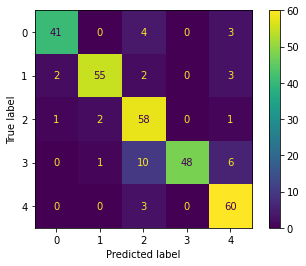

KNeighborsClassifier()

In [ ]:
#apply KNeighborsClassifier on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8271428571428572
the accuracy is0.8166666666666667


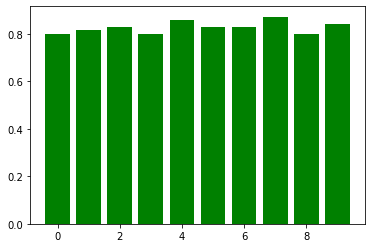

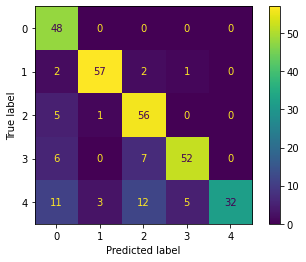

KNeighborsClassifier()

In [ ]:
#apply KNeighborsClassifier on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.8714285714285716
the accuracy is0.8933333333333333


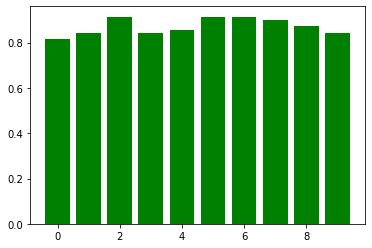

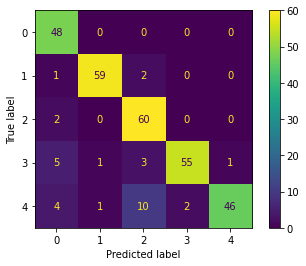

KNeighborsClassifier()

In [ ]:
#apply KNeighborsClassifier on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.7142857142857143
the accuracy is0.7


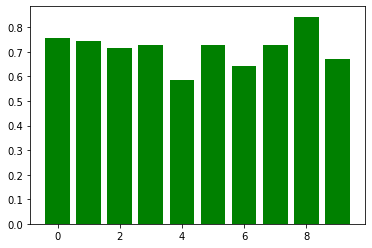

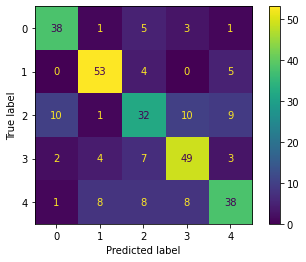

KNeighborsClassifier()

In [ ]:
#apply KNeighborsClassifier on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
kneighborsClassifier(x_train,x_test,y_train,y_test)

the cross_validation result is 0.7257142857142856
the accuracy is0.7166666666666667


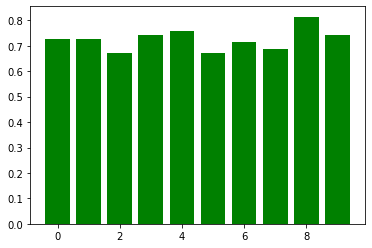

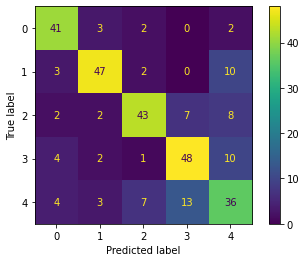

DecisionTreeClassifier()

In [ ]:
#apply decesion_tree on  pow
x_train,x_test,y_train,y_test = split_data(X_train_counts,df['book_name'])
model1=Decesion_tree(x_train,x_test,y_train,y_test)
model1

the cross_validation result is 0.7128571428571429
the accuracy is0.7633333333333333


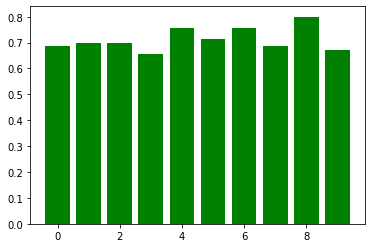

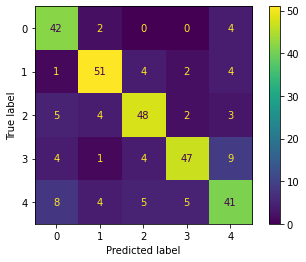

DecisionTreeClassifier()

In [ ]:
#apply decesion_tree on  tf-idf
x_train,x_test,y_train,y_test = split_data(X_train_tf,df['book_name'])
model2=Decesion_tree(x_train,x_test,y_train,y_test)
model2

the cross_validation result is 0.7114285714285714
the accuracy is0.72


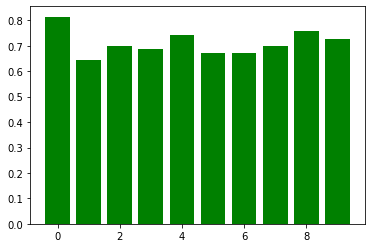

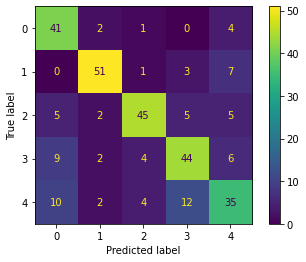

DecisionTreeClassifier()

In [ ]:
#apply decesion_tree on  n_gram
x_train,x_test,y_train,y_test = split_data(x_train_ngram,df['book_name'])
model3=Decesion_tree(x_train,x_test,y_train,y_test)
model3

the cross_validation result is 0.6957142857142857
the accuracy is0.6433333333333333


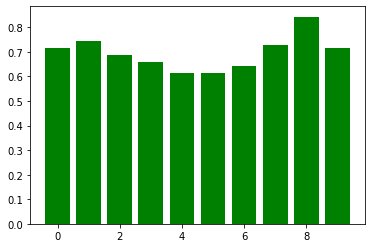

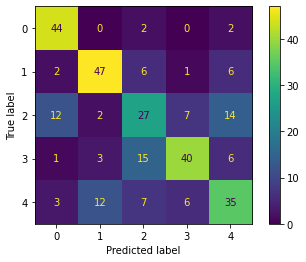

DecisionTreeClassifier()

In [ ]:
#apply Decesion_tree  on  LDA
x_train,x_test,y_train,y_test = split_data(lda_x, lda_y)
model4=Decesion_tree(x_train,x_test,y_train,y_test)
model4

#visualization 

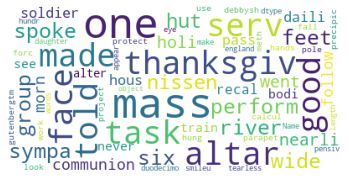

In [ ]:
import wordcloud
import matplotlib.pyplot as plt
wc=wordcloud.WordCloud(background_color='white',max_words=100,max_font_size=50)
wc=wc.generate(str(df['words']))
fig=plt.figure(num=1)
plt.axis('off')
plt.imshow(wc,cmap=None)
plt.show()

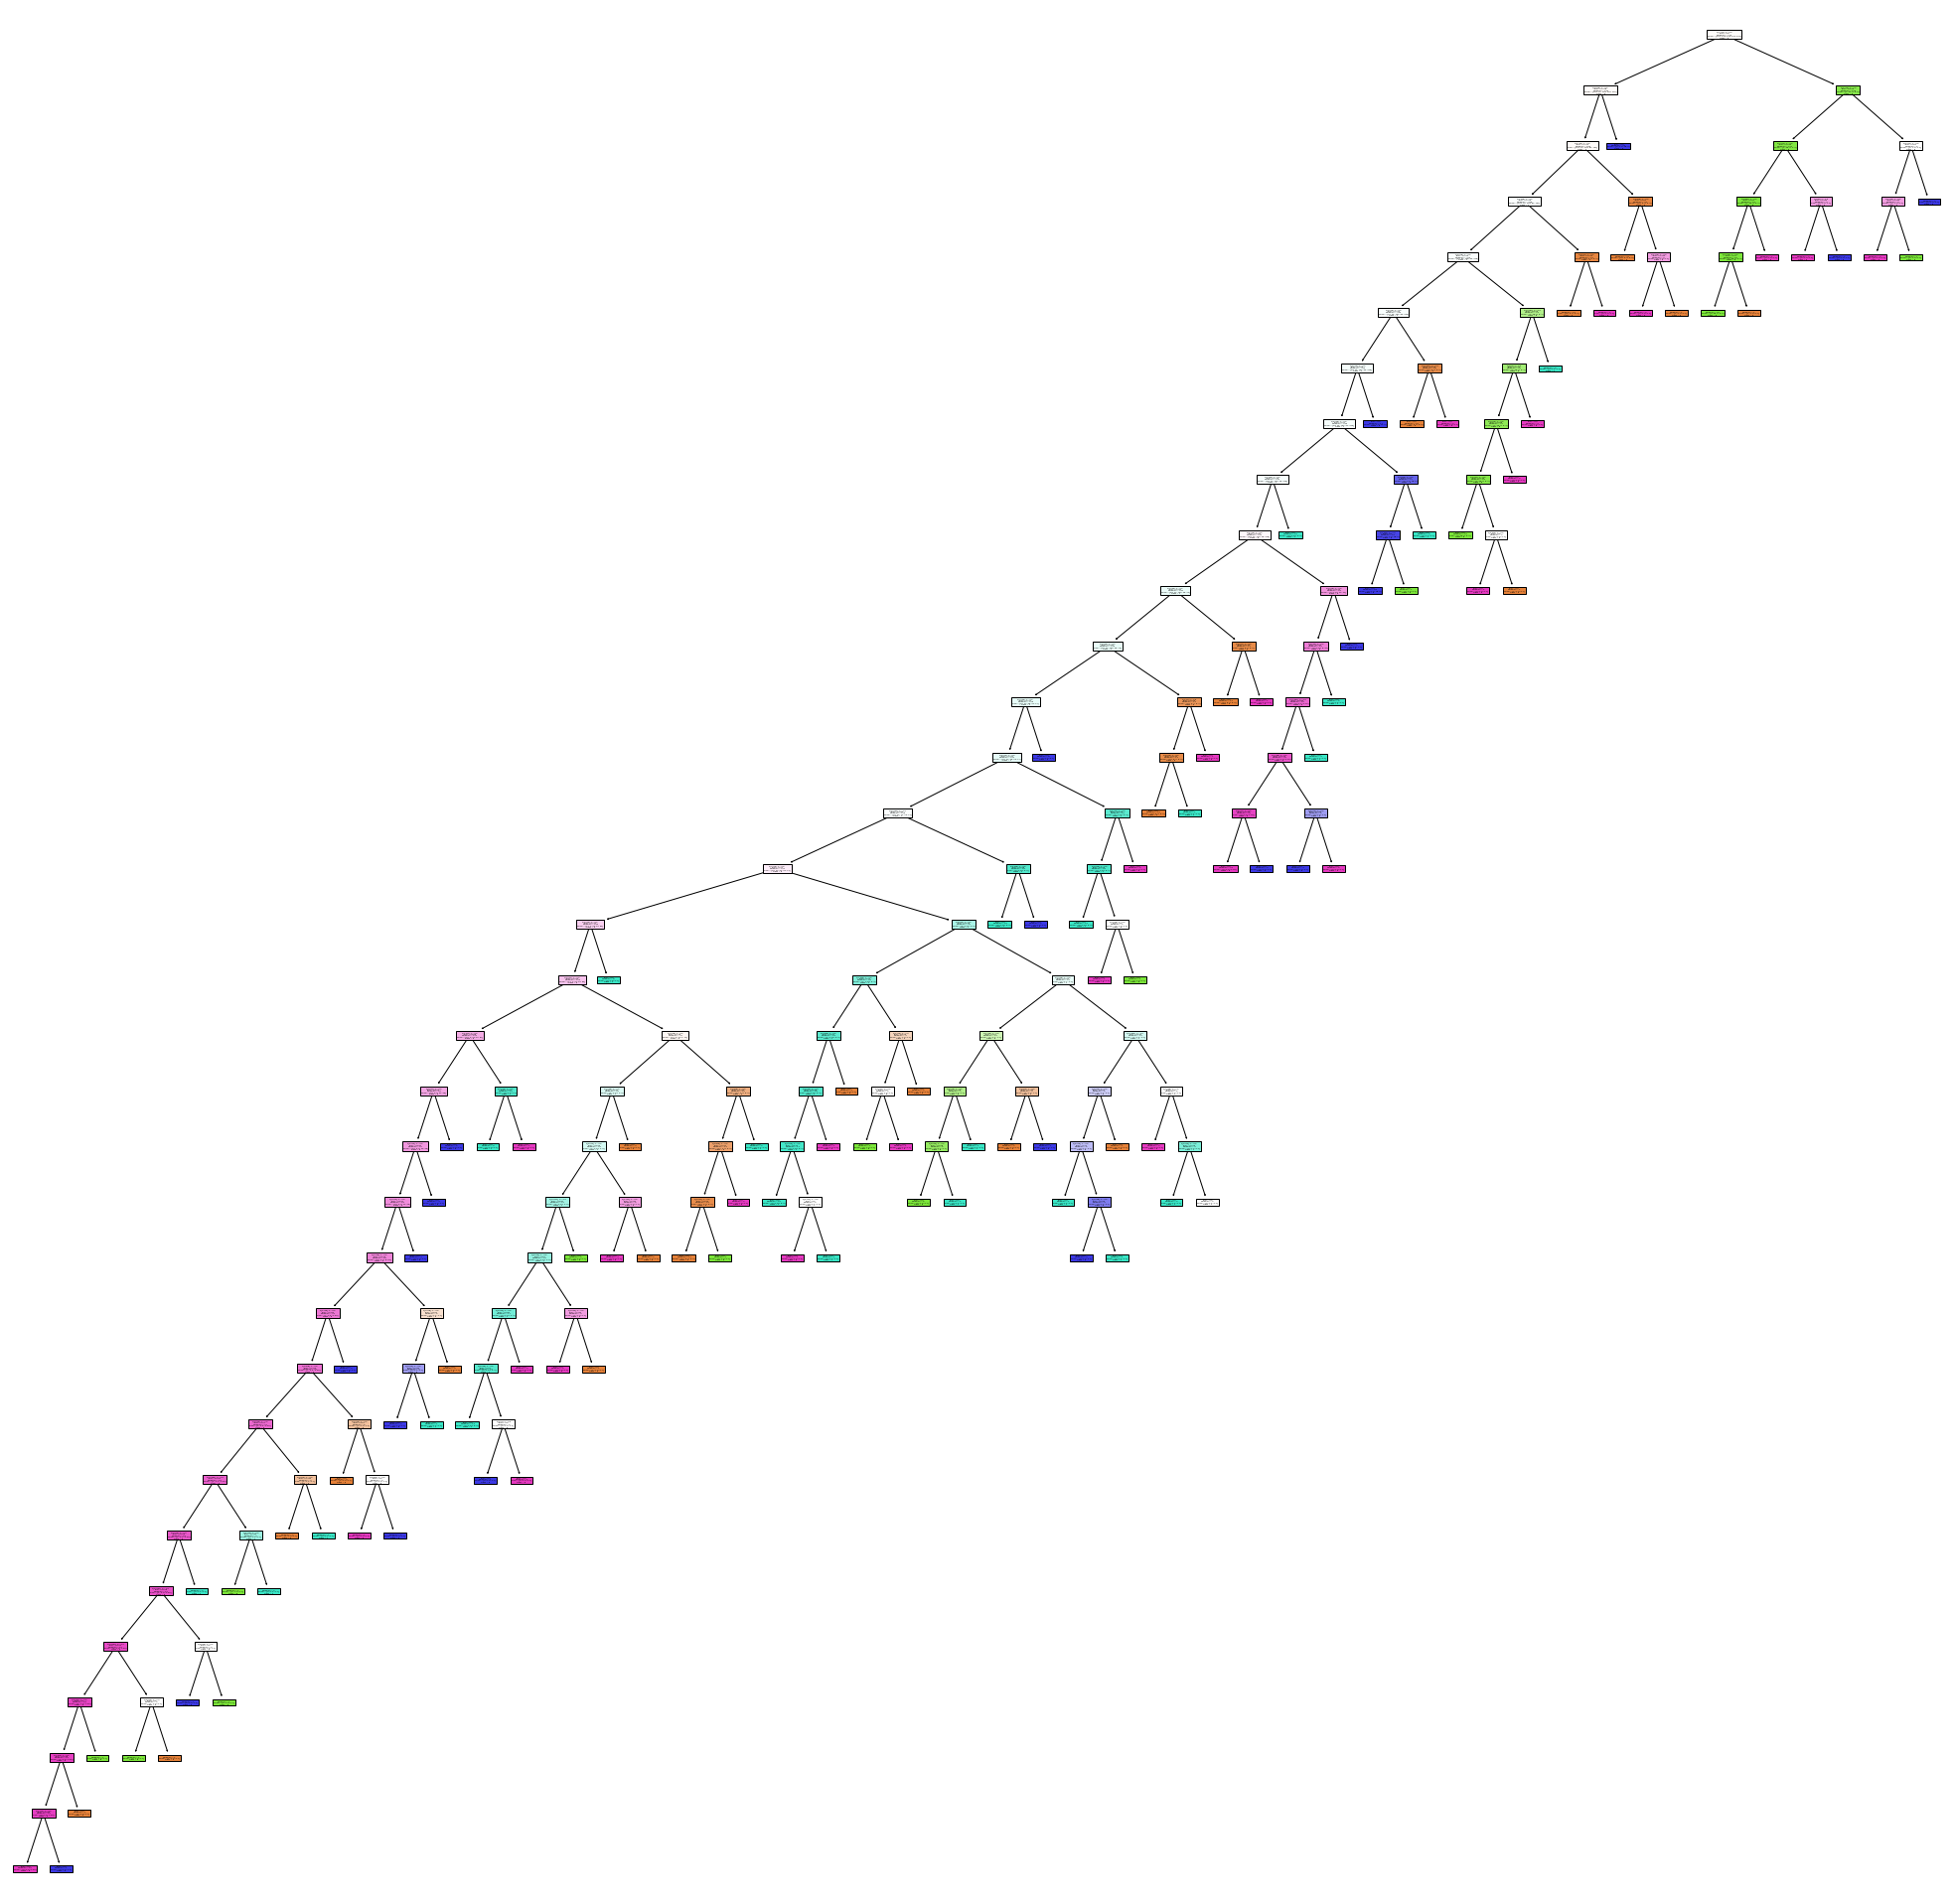

In [ ]:
plt.figure(figsize=(35,35)) 
fig = tree.plot_tree(model1,class_names=['a','b','c','d','e'],filled=True)
plt.savefig('fig.png')

In [ ]:
text_representation = tree.export_text(model1)
print(text_representation)
plt.savefig('fig.png')
with open("decistion_tree.png", "w") as fout:
    fout.write(text_representation)

|--- feature_7707 <= 0.50
|   |--- feature_6878 <= 0.50
|   |   |--- feature_5792 <= 0.50
|   |   |   |--- feature_1498 <= 0.50
|   |   |   |   |--- feature_6978 <= 0.50
|   |   |   |   |   |--- feature_2209 <= 0.50
|   |   |   |   |   |   |--- feature_2100 <= 0.50
|   |   |   |   |   |   |   |--- feature_5199 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1433 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_6705 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4080 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |   |--- feature_4080 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_6705 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4609 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_4609 >  0.50
| 

<Figure size 432x288 with 0 Axes>

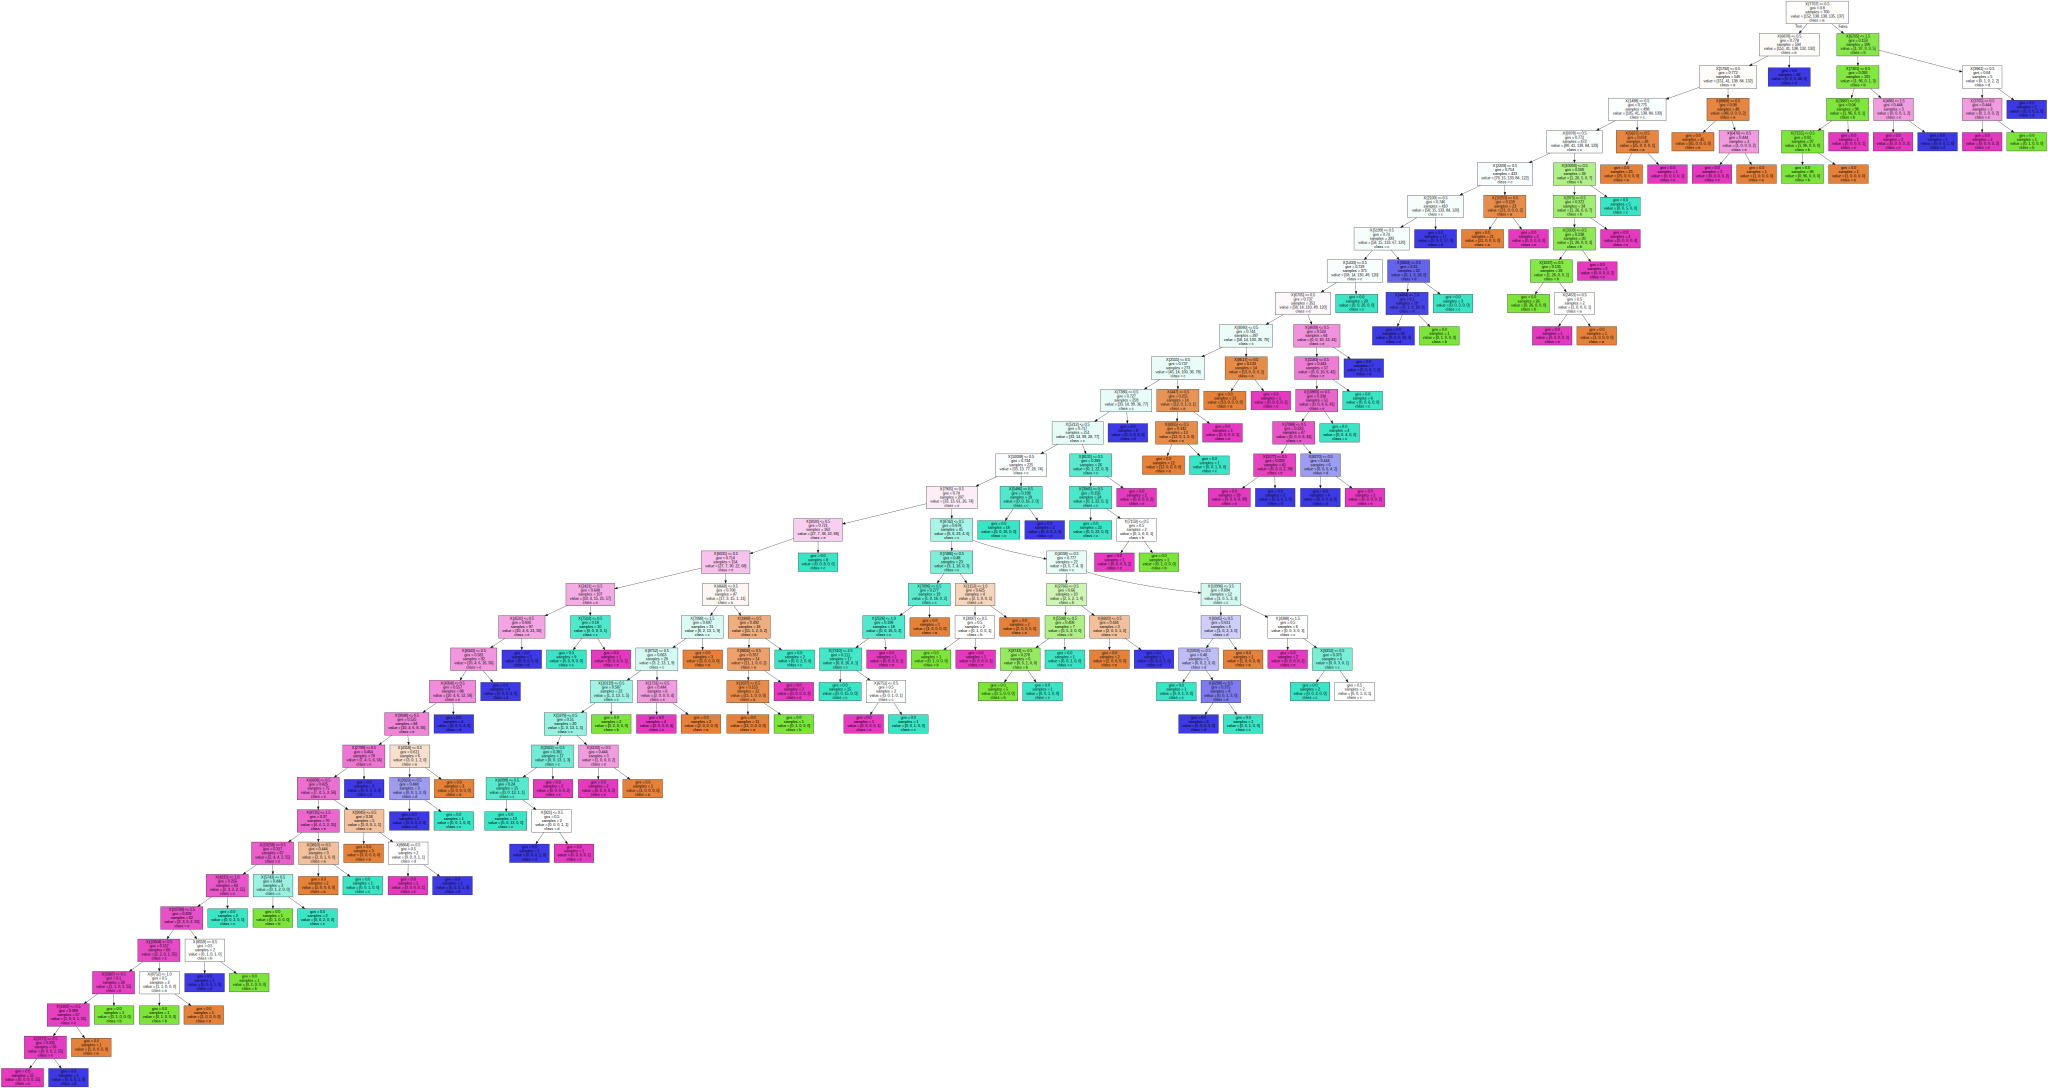

In [ ]:
# DOT data
dot_data = tree.export_graphviz(model1, out_file=None,   
                                class_names=['a','b','c','d','e'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.save('image.png')
graph
